In [11]:
import shutil, random, json
from glob import glob
import IPython.display as ipd
from tqdm.auto import tqdm
from pathlib import Path
import numpy as np
import cv2, ipyplot

In [6]:
videos = glob('data/delivery_final_3D/image/*/*')
len(videos), videos[-1]

(3831, 'data/delivery_final_3D/image/6-5/6-5_613-C05')

In [7]:
video = random.choice(videos)
for video in tqdm(videos):
    jpgs = sorted(glob(f'{video}/*.jpg'))
    last = jpgs[-1]
    shutil.copy(last, 'last_image')
    mid = jpgs[len(jpgs)*2//3]
    shutil.copy(mid, 'neg_image')

In [8]:
lasts = glob('last_image/*.jpg')
negs  = glob('neg_image/*.jpg')
random.shuffle(lasts)
random.shuffle(negs)
lasts1, lasts2 = lasts[0::2], lasts[1::2]
negs1,  negs2  = negs[0::2],  negs[1::2]
len(lasts1), len(lasts2), len(negs1), len(negs2)

(1916, 1915, 1916, 1915)

In [ ]:
shutil.rmtree('merged10')
Path('merged10').mkdir()
for idx, i in enumerate(tqdm(range(0,len(lasts),5))):
    l = lasts[i:i+5]
    n = negs[i:i+5]
    if len(l) < 5 or len(n) < 5:
        break
    smalls = [cv2.imread(e) for e in l[:4] + n[:4]]
    larges = [cv2.imread(e) for e in [l[4],n[4]]]
    ws, hs = (1920//4, 1080//4)
    wl, hl = (1920//2, 1080//2)
    smalls = [cv2.resize(e, (ws*3//2, hs*3//2), cv2.INTER_AREA) for e in smalls]
    larges = [cv2.resize(e, (wl, hl), cv2.INTER_AREA) for e in larges]
    im = np.full((1080,1920,3), 128, dtype=np.uint8)
    m = 30 
    im[0*hs:1*hs, 0*ws:1*ws] = smalls[0][m:m+hs  , m:m+ws]
    im[0*hs:1*hs, m+1*ws:2*ws] = smalls[1][m:m+hs: ,-ws:-m]
    im[m+1*hs:2*hs, 0*ws:1*ws] = smalls[2][-hs:-m, m:m+ws]
    im[m+1*hs:2*hs, m+1*ws:2*ws] = smalls[3][-hs:-m,-ws:-m]
    im[0*hs:1*hs, m+2*ws:3*ws] = smalls[4][m:m+hs,   m+m:m+ws]
    im[0*hs:1*hs, m+3*ws:4*ws] = smalls[5][m:m+hs:, -ws:-m]
    im[m+1*hs:2*hs, m+2*ws:3*ws] = smalls[6][-hs:-m, m+m:m+ws]
    im[m+1*hs:2*hs, m+3*ws:4*ws] = smalls[7][-hs:-m,-ws:-m]
    im[m+1*hl:2*hl, 0*wl:1*wl] = larges[0][m:,:]
    im[m+1*hl:2*hl, m+1*wl:2*wl] = larges[1][m:,m:]
    cv2.imwrite(f'merged10/human_pose_m10_{idx:04d}.png', im)

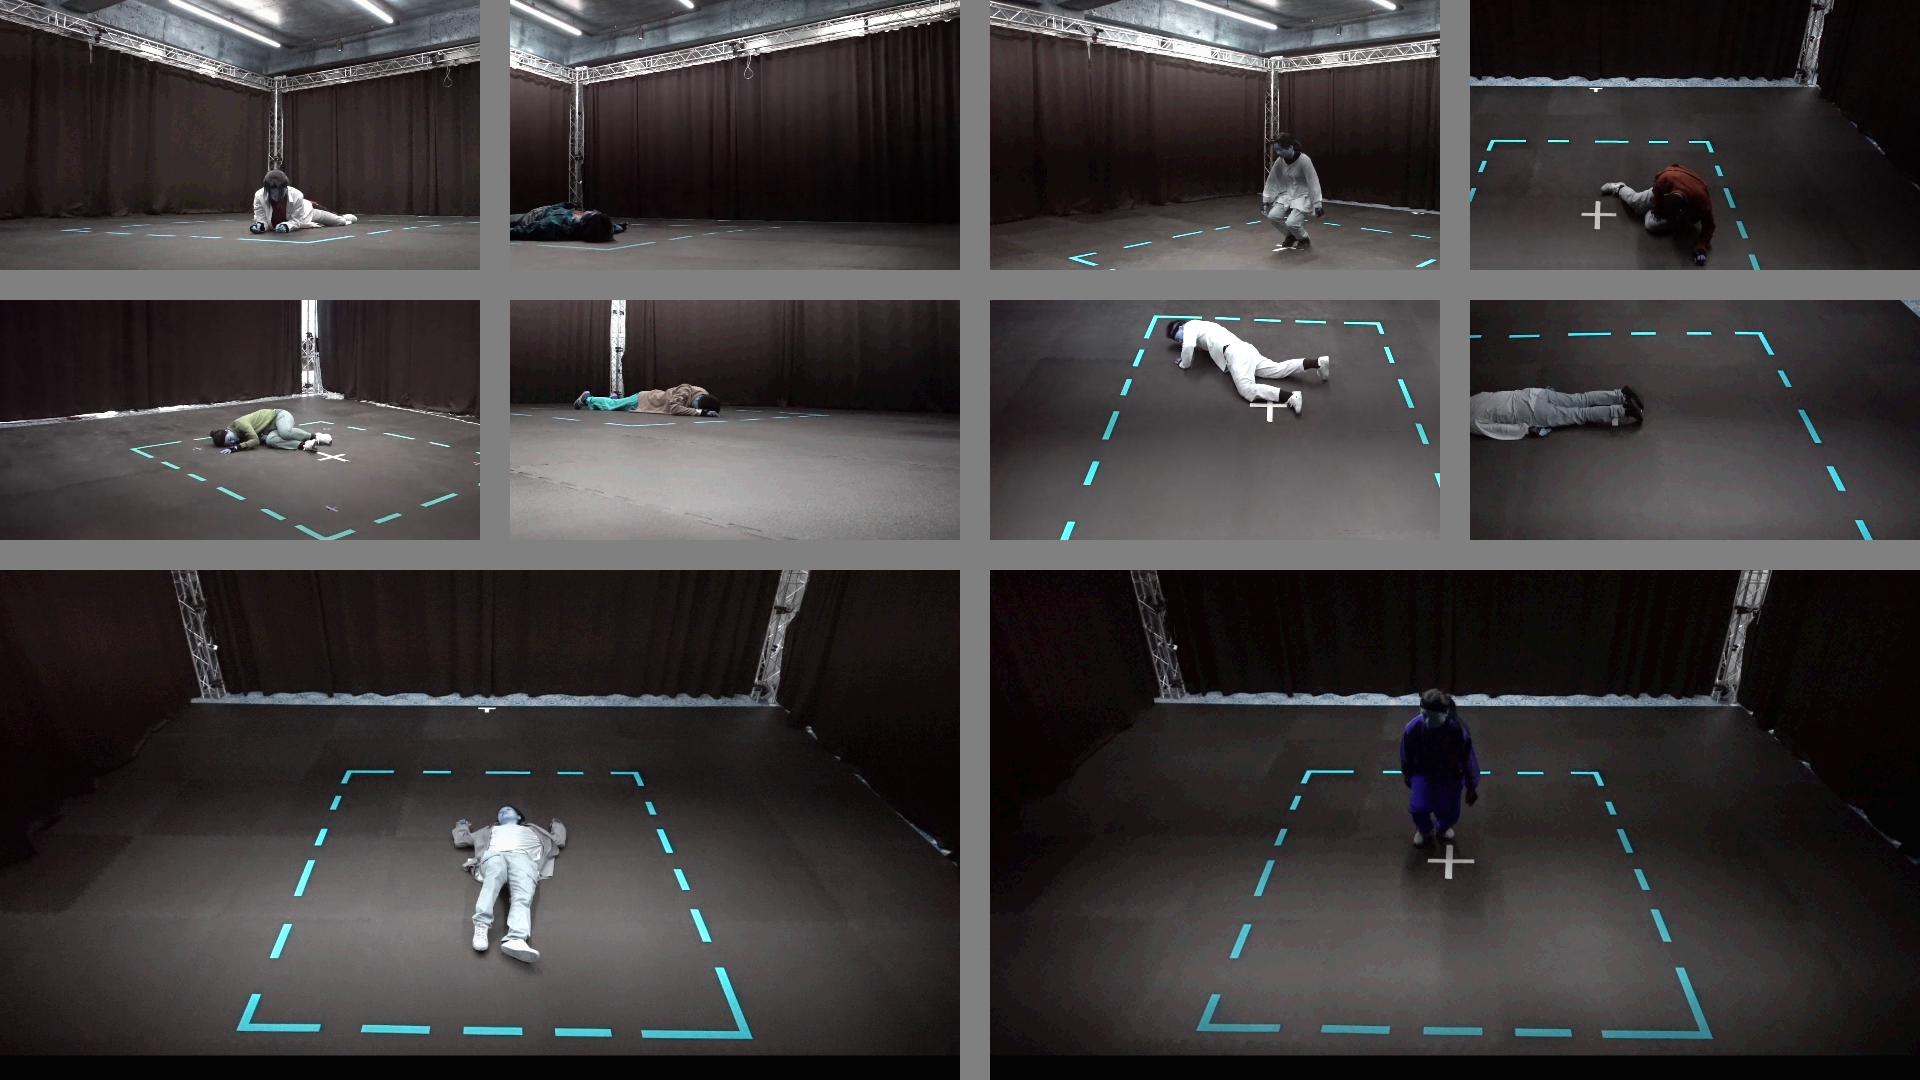

In [60]:
import numpy as np
from PIL import Image
Image.fromarray(im)


In [136]:
smalls[3].shape, smalls[4].shape, im[0*hs:1*hs, 2*ws:3*ws].shape, 2*ws, 3*ws, im.shape

((270, 480, 3), (270, 480, 3), (270, 120, 3), 960, 1440, (1920, 1080, 3))

In [ ]:
img = lasts[1234]
stem = Path(img).stem
gr = stem.split('_')[0]
video = '_'.join(stem.split('_')[:-1])
print(Image.open(img).size)
print(stem)
print(video)
print(gr)
anno = f'../2D/{gr}/{video}_2D.json'
with open(anno) as f:
    anno = json.load(f)

print(img)
anno
